In [7]:

#from imutils import contours
#!pip install -q cv2
from skimage import measure
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pickle
import os
from PIL import Image
from os import listdir
from matplotlib.backends.backend_pdf import PdfPages

In [8]:
df = pd.read_pickle("ash2.pkl")
neural_ip = np.zeros((405))

In [9]:
input_array = []
aray2 = []
neural_ip = []
x_curr = []
indx = []
y_curr = []
x_actual_down = []
y_actual_down = []
for index,row in df.iterrows():
    #x[x<10] = 0
    #if(index > 100):
     #   break
    x = row['array']
    x = np.fromstring(x[1:-1], sep=",")
    b = np.asarray(x).reshape(27,15)
    thresh = cv2.threshold(b, 10, 255, cv2.THRESH_BINARY)[1]
    labels = measure.label(thresh, neighbors=8, background=0)
    mask = np.zeros(thresh.shape, dtype="uint8")
    for label in np.unique(labels):                
        if label == 0:
            continue 
        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)
        if numPixels > 5:
            mask = cv2.add(mask, labelMask)
    flat_mat = mask.flatten()
    idx = np.nonzero(flat_mat)
    repl_mat = np.zeros(flat_mat.shape,dtype = "uint8")
    for i in idx:
        repl_mat[idx] = x[idx]
    if (np.all(repl_mat == 0)):
        continue
    neural_ip.append(repl_mat)
    x_curr = np.append(x_curr,row['x_curr'])
    x_actual_down = np.append(x_actual_down,row['x_actual_down'])
    indx = np.append(indx,index)
    y_curr = np.append(y_curr,row['y_curr'])
    y_actual_down = np.append(y_actual_down,row['y_actual_down'])
    
aray2 = neural_ip.copy()
print(np.shape(neural_ip))
d = {'indx' :indx ,'x_curr': x_curr, 'y_curr': y_curr ,'x_actual':x_actual_down,'y_actual':y_actual_down, 'aray2' : aray2}
df1 = pd.DataFrame(data=d)
print(df1)
df1.to_pickle('processed_ash_pck.pkl')

(28905, 405)
                                                   aray2  indx  x_actual  \
0      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   0.0     306.0   
1      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   1.0     306.0   
2      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   2.0     306.0   
3      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   3.0     306.0   
4      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   4.0     306.0   
5      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   5.0     306.0   
6      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   6.0     306.0   
7      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   1.0     872.0   
8      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   2.0     872.0   
9      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   3.0     872.0   
10     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   4.0     872.0   
11     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   5.0     872.0   

In [5]:
pdf_pages = PdfPages('my-fancy-document.pdf')

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


done


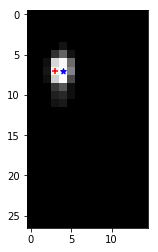

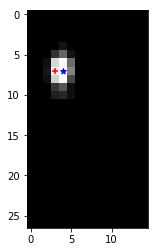

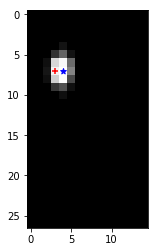

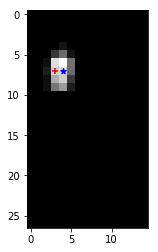

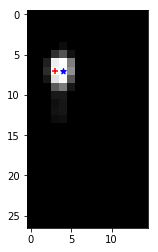

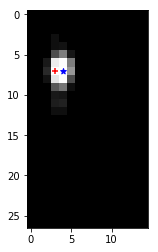

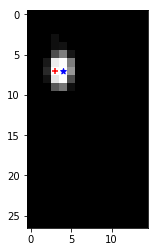

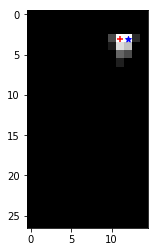

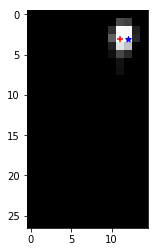

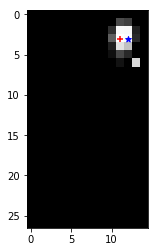

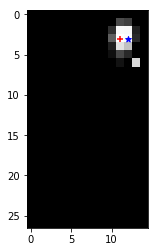

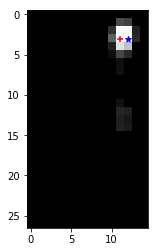

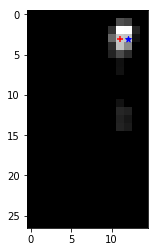

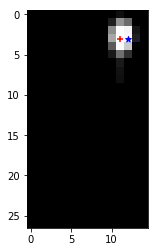

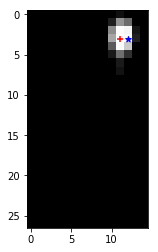

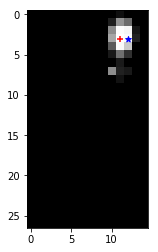

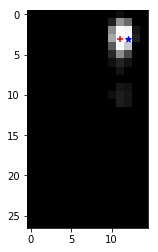

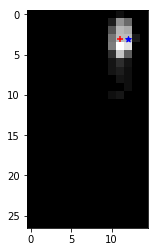

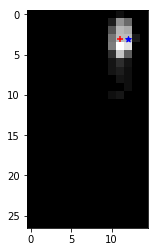

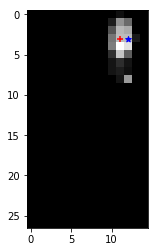

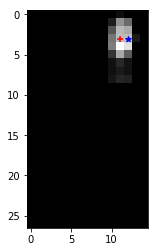

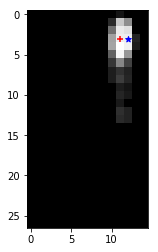

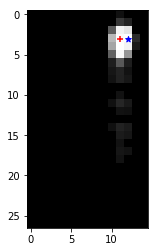

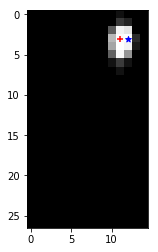

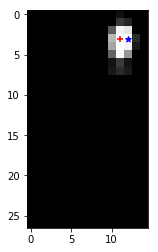

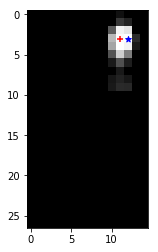

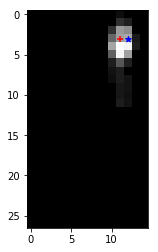

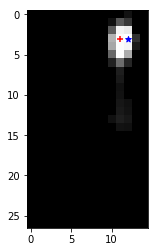

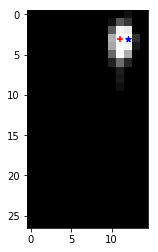

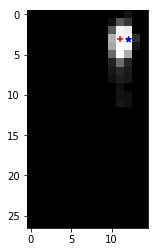

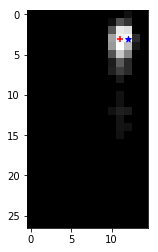

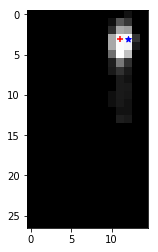

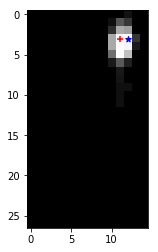

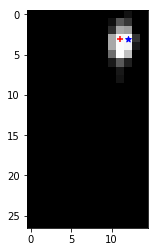

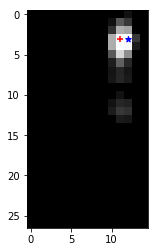

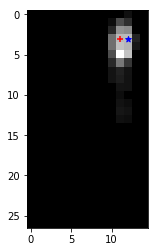

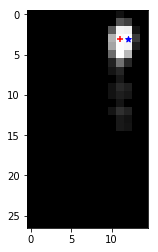

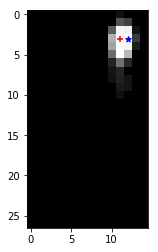

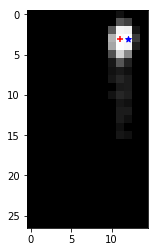

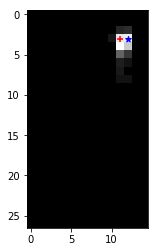

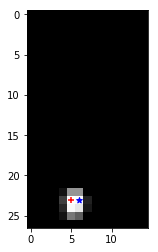

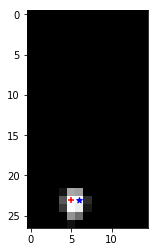

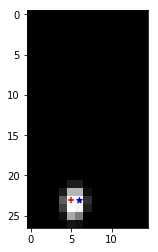

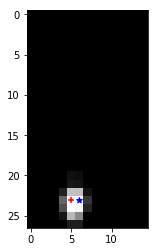

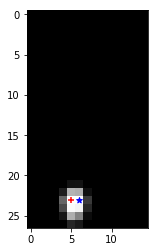

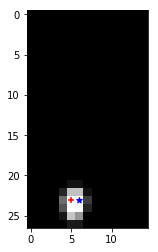

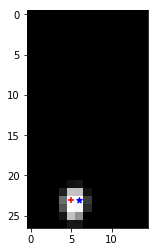

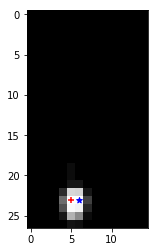

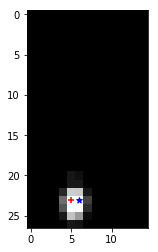

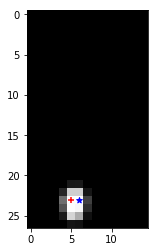

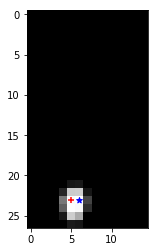

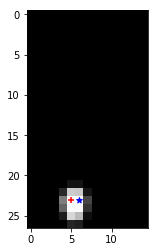

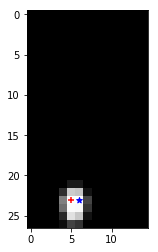

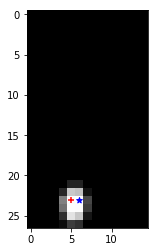

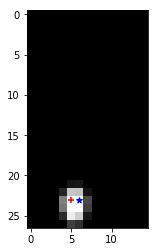

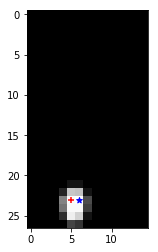

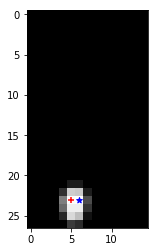

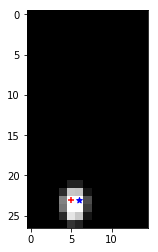

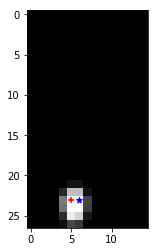

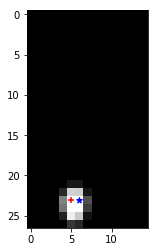

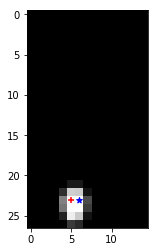

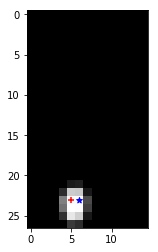

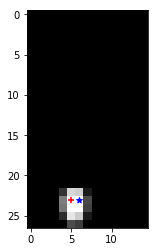

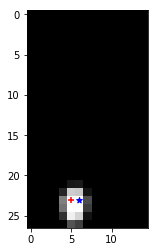

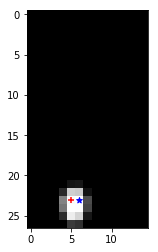

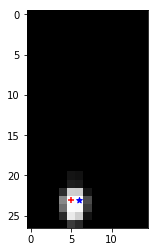

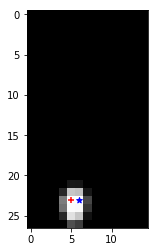

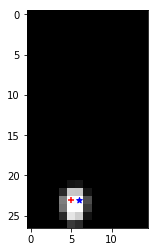

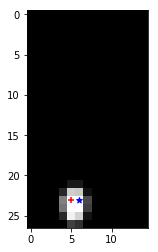

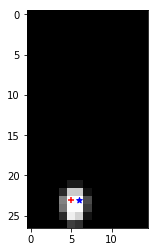

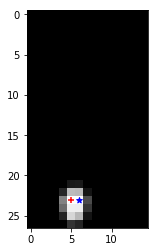

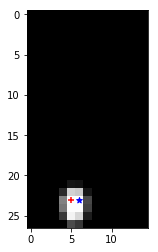

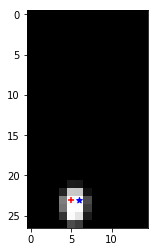

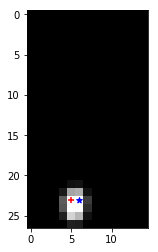

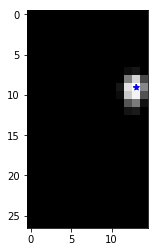

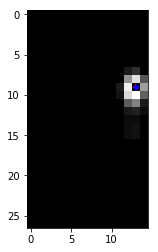

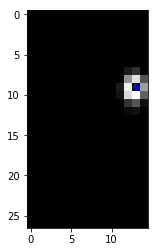

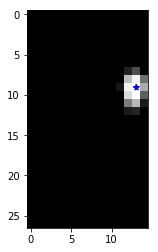

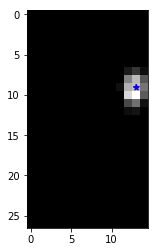

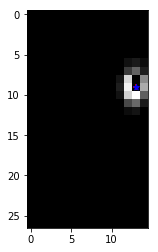

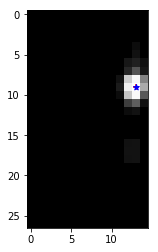

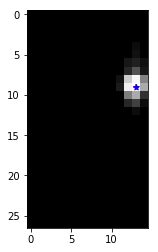

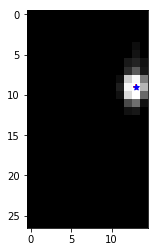

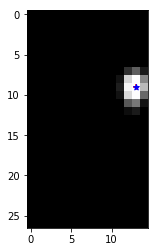

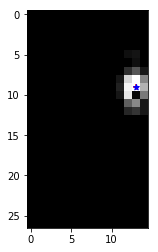

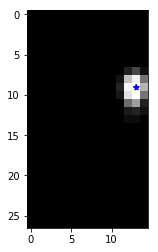

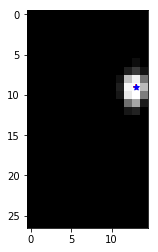

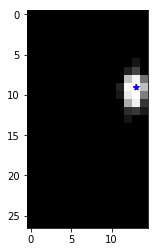

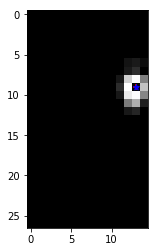

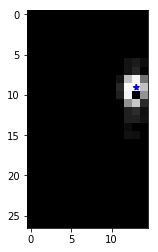

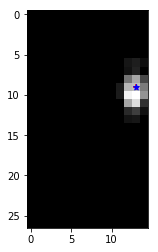

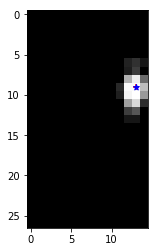

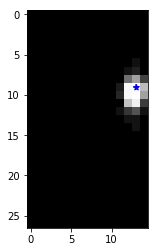

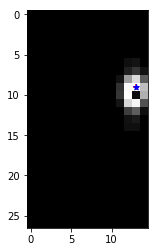

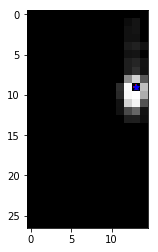

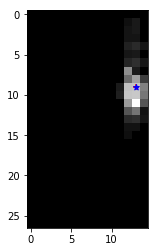

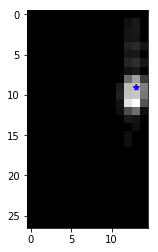

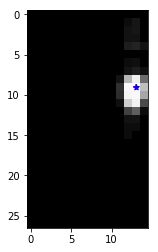

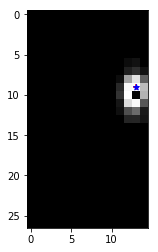

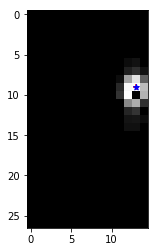

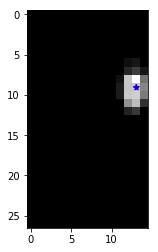

In [6]:
for i,el in enumerate(df1.aray2):
    if (i>100):
        break
    a = df1.aray2[i].reshape(27,15)  # a = aray2[i]
    #I = np.dstack([a,a,a])
    #print(I.shape)
    x_ch = int((15/1079)*df1.x_curr[i])
    y_ch = int((27/1919)*df1.y_curr[i])
    x_act = int((15/1079)*x_actual_down[i])
    y_act = int((27/1919)*y_actual_down[i])
    #I[y_ch,x_ch,:] = [1,0,0]
    #I[y_act,x_act,:] = [0,1,0]
    fig = plt.figure()
    ax = plt.subplot()
    ax.imshow(a, interpolation = 'nearest', cmap = 'Greys_r')
    plt.scatter(x_ch, y_ch, c='red', marker='+')
    plt.scatter(x_act, y_act, c='blue', marker='*')
    pdf_pages.savefig(fig)
    #fig = plt.figure()
    #plt.imshow(np.reshape(df1.aray2[i],(27,15)),cmap= 'Greys_r')
pdf_pages.close()
print("done")    

(18, 405)
done


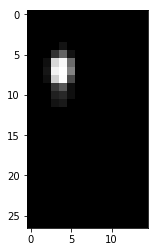

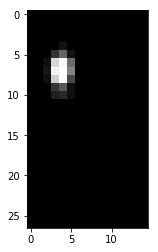

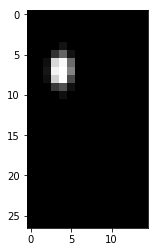

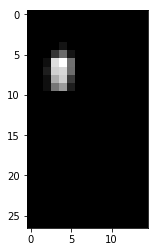

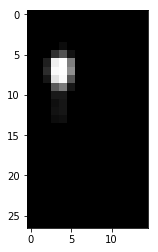

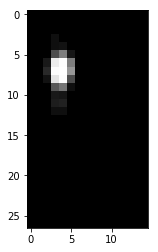

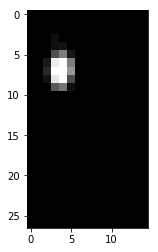

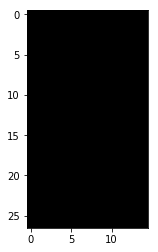

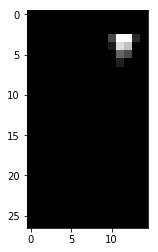

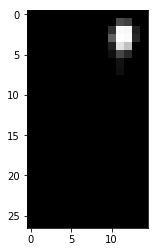

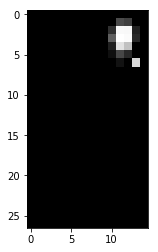

In [144]:

#print(np.shape(aray2))
#rows = np.shape(aray2)[0]/2
#cols =np.shape(aray2)[0] - rows


#for i, el in enumerate(aray2):
    #moving axis to use plt: i.e [4,100,100] to [100,100,4]
    #print(i)
    #if (i > 10):
     #   break
    #im = Image.new('1',(15,27))
    #fig = plt.figure()
    #array2 = np.moveaxis(aray2[i], 0, -1)
    
   
    #plt.subplot(4,3, i + 1)
    #plt.imshow(np.reshape(array2,(27,15)),cmap= 'Greys_r')
    #plt.imshow(np.reshape(array2,(27,15))) 
    #pdf_pages.savefig(fig)
    #plt.savefig(('plot{}',i))
    #plt.imsave("iteration{}.png".format(i),np.reshape(array2,(27,15)),cmap='gray')
#pdf_pages.close()
#plt.show()
#f.savefig("plot2.pdf")
#print("done")
